Note that you will need to install the ```lattice_hamiltonian``` module before you can run this notebook. You can do this by running `python -m pip install` from the command line after navigating to the directory where you have saved the ReCoDe_Lattice_Hamiltonian project. 

Run the cell below to import the modules needed to run the lattice Hamiltonian. We also import some other, basic Python modules which are used for saving the outputs of this notebook. 

In [1]:
import os
import warnings
from datetime import datetime

from lattice_hamiltonian.lattice_plots import plot_energies, plot_state_distribution
from lattice_hamiltonian.run_lattice import sweep_parameter

warnings.filterwarnings("ignore", category=RuntimeWarning)

Use the next cell to define the file where you want to save any output plots. By default, plots will be saved in the 'plots' folder under the current working directory, and labelled by today's date.

In [2]:
pwd = os.getcwd()
now = datetime.now()
save_path = pwd + "/plots/" + now.strftime("%d%b%Y-1/")
if not os.path.exists(save_path):
    os.makedirs(save_path)

In the cell below, we run the code for a range of values of the electronic coupling parameter, ```t0```. This parameter determines how strongly neighbouring lattice sites interact with one another, and thus the extent to which the eigenstates are localised on single lattice sites (small ```t0```) or spread over the whole lattice (large ```t0```).

To run the parameter sweep, we use the ```sweep_parameter``` function from ```RunLattice.py```. This function calls solves the Hamiltonian for each value of the ```parameter_to_vary``` in ```parameter_array```. All the other input parameters are held constant at the values defined in the ```parameter_dict```. 

The output of ```sweep_parameter``` is a dictionary containing the solutions for each value of ```t0```. Each solution is an instance of the ```Lattice``` class, from which you can access information about the eigenstates. This information is stored in a dataframe which is an attribute of the ```Lattice``` class and can be accessed as follows: ```lattice_dict[i].states```, where ```i < len(parameter_array)```. 

We note that we have set ```size = 5``` in this file to ensure that the code runs quickly (it should take ~30 seconds). Larger lattices can be used (up to ```size = 10```), but the time taken to solve the Hamiltonian and find the steady-state populations of the eigenstates increases rapidly with the size of the lattice, so it could take a while to complete the calculations. 

In [3]:
# This should be a string - see the RunLattice.py file for all the possible parameters
parameter_to_vary = "t0"
# A list containing the values you want parameter_to_vary to take
parameter_array = [2e-3, 4e-3, 6e-3, 8e-3, 10e-3]
# A dictionary containing the value of all the parameters which are being held constant
parameter_dict = {
    "size": 5,
    "e_singlet": 1.4,
    "d0": 5e-3,
    "r0d": 0.1,
    "const_recombination": True,
    "krec_ex": 1e9,
    "j0": 1.5,
    "r0j": 0.1,
    "F": 0,
    "disorder_site_ene": 50e-3,
}

lattice_dict = sweep_parameter(parameter_to_vary, parameter_array, parameter_dict)

As noted above, we can now investigate some properties of the eigenstates by viewing the ```states``` dataframe:

In [4]:
lattice_dict[4].states.head(5)

,state,energies,dis_eh,IPR,ex_char,transdip_ex,krec_ex,occupation_probability,gen,z
0,1,1.293656,0.062609,"[1.012576626397154, 2.956031589391261, 3.48415...",0.993762,0.993762,9.937616e+08,"[9.285978036160056e-12, 3.546551013372426e-13,...",0.993762,9.616279e-09
1,2,1.314679,0.029000,"[1.0312699488224568, 2.9676249411997397, 2.362...",0.997104,0.997104,9.971041e+08,"[2.3219431820031954e-07, 9.201190138654438e-11...",0.997104,4.264775e-09
2,3,1.319829,0.042339,"[1.0477852074081824, 3.6899671115519186, 2.439...",0.995778,0.995778,9.957776e+08,"[0.0018517080890441554, 6.407006664737485e-07,...",0.995778,3.498093e-09
3,4,1.339312,0.042081,"[1.2544733877533905, 3.9288488384280447, 3.167...",0.995805,0.995805,9.958048e+08,"[0.002300087456286626, 0.000798919231818634, 1...",0.995805,1.663087e-09
4,5,1.342775,0.068531,"[1.2355373465318105, 3.7797557581419285, 3.710...",0.993172,0.993172,9.931720e+08,"[0.00023230017796325593, 7.206527420581285e-05...",0.993172,1.455195e-09


Although the dataframe is useful, it is hard to visualise the states in this format. To get a better idea of how the energies of the eigenstates depends upon the electron-hole seperation, $r_{\mathrm{e-h}}$, we can use the ```plot_energies``` function. Run the cell below to use this function and see how the energies of the eigenstates depends on the electron-hole separation and the value of ```t0```.

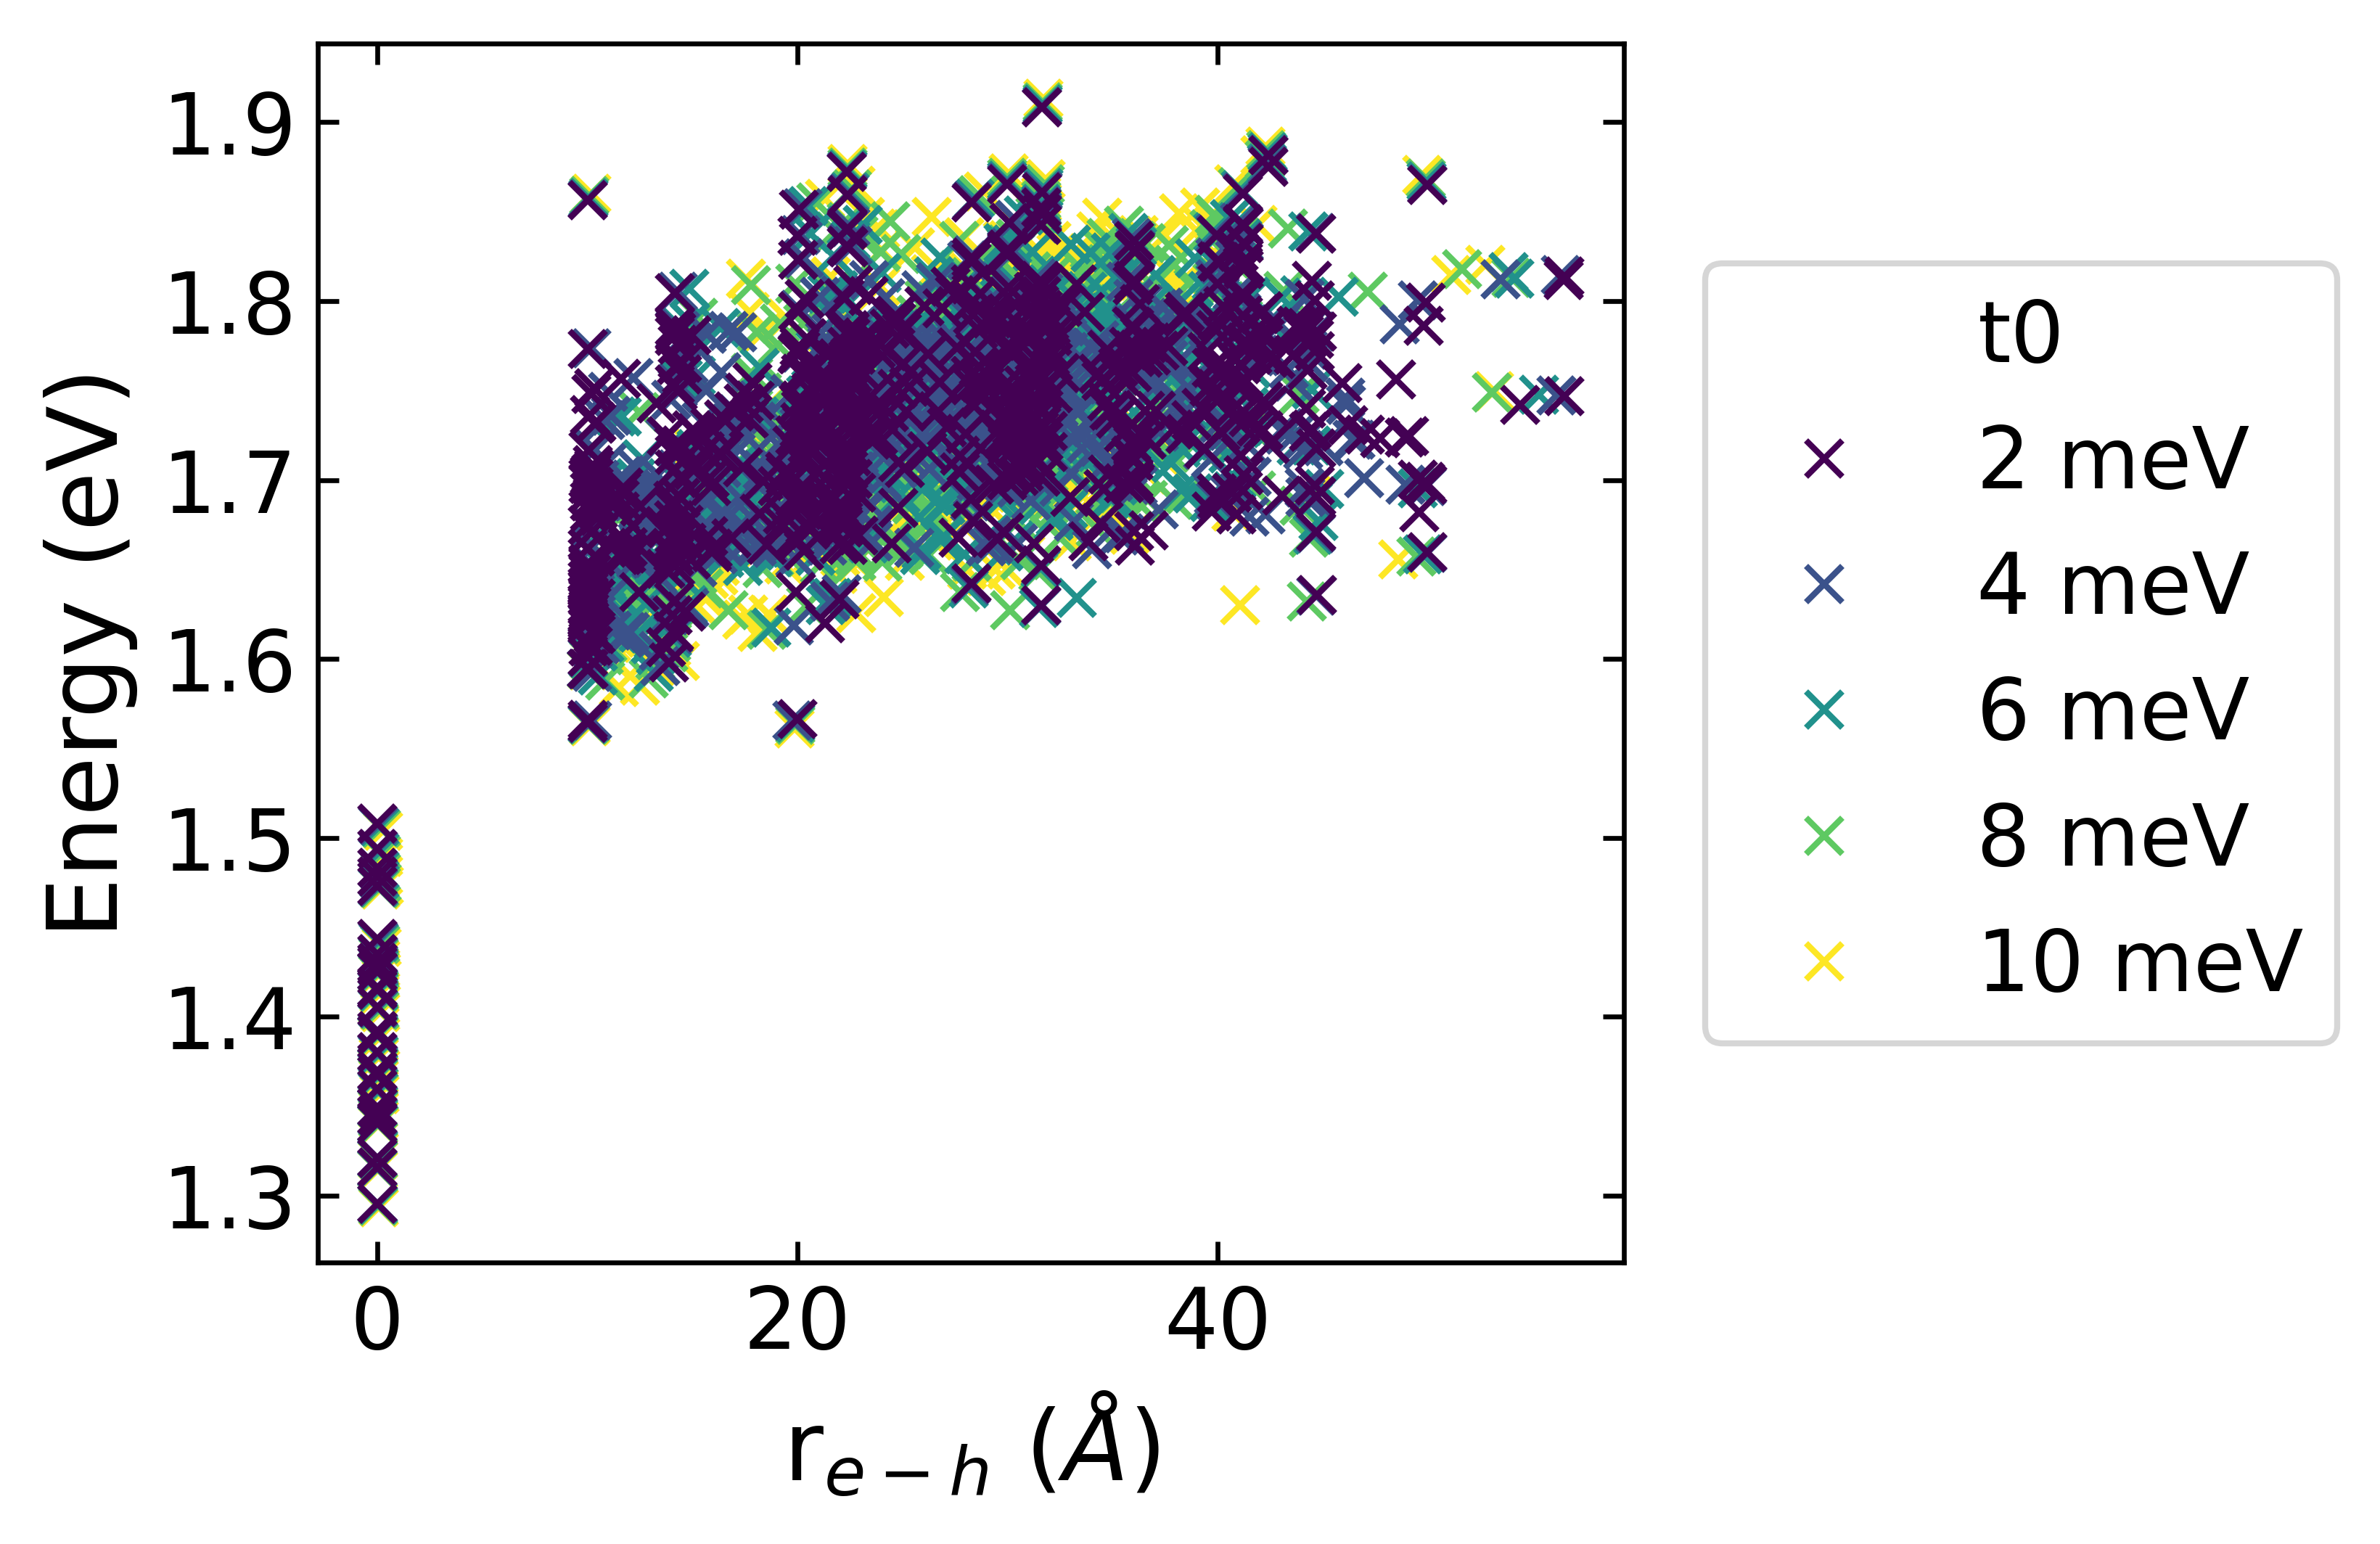

In [5]:
# Set save = True if you want to save the figure
save = False
# These labels will go in the legend of the figure
labels = ["2 meV", "4 meV", "6 meV", "8 meV", "10 meV"]
plot_energies(lattice_dict, parameter_array, labels, parameter_to_vary, save, save_path)

Looking at the plot above, we can see that there two groups of states: a cluster with located at $r_{\mathrm{e-h}}$ = 0 and a broad spread of states with greater values of $r_{\mathrm{e-h}}$. 

The states at $r_{\mathrm{e-h}}$ = 0 are the excitons (i.e., the elctron and hole occupy the same lattice site) and we can see that their distribution is not greatly affected by changing ```t0```. 

The broad spread of states is due to states where the electron and hole are on different lattice sites. The energy of these states increases as $r_{\mathrm{e-h}}$ increases because the electron and hole must do work to overcome their mutual electrostatic attraction. The plot shows that these states begin to take a more continuous range of values of $r_{\mathrm{e-h}}$ as ```t0``` increases. This is due to their increasing delocalisation, as you can explore in the cells below. 

Run the cell below to see how the electron and hole probability density is distributed across the lattice for a given eigenstate. You can choose which solution to look at by varying the ```which_lattice``` parameter and you can select a state by varing the ```which_state``` parameter. By default, the eigenstates are ranked by their energy and so ```which_state = 0``` corresponds to the lowest energy state. What do you notice about the delocalisation of the states as you go from small ```t0``` (```which_lattice = 0```) to large ```t0``` (```which_lattice = 4```)?

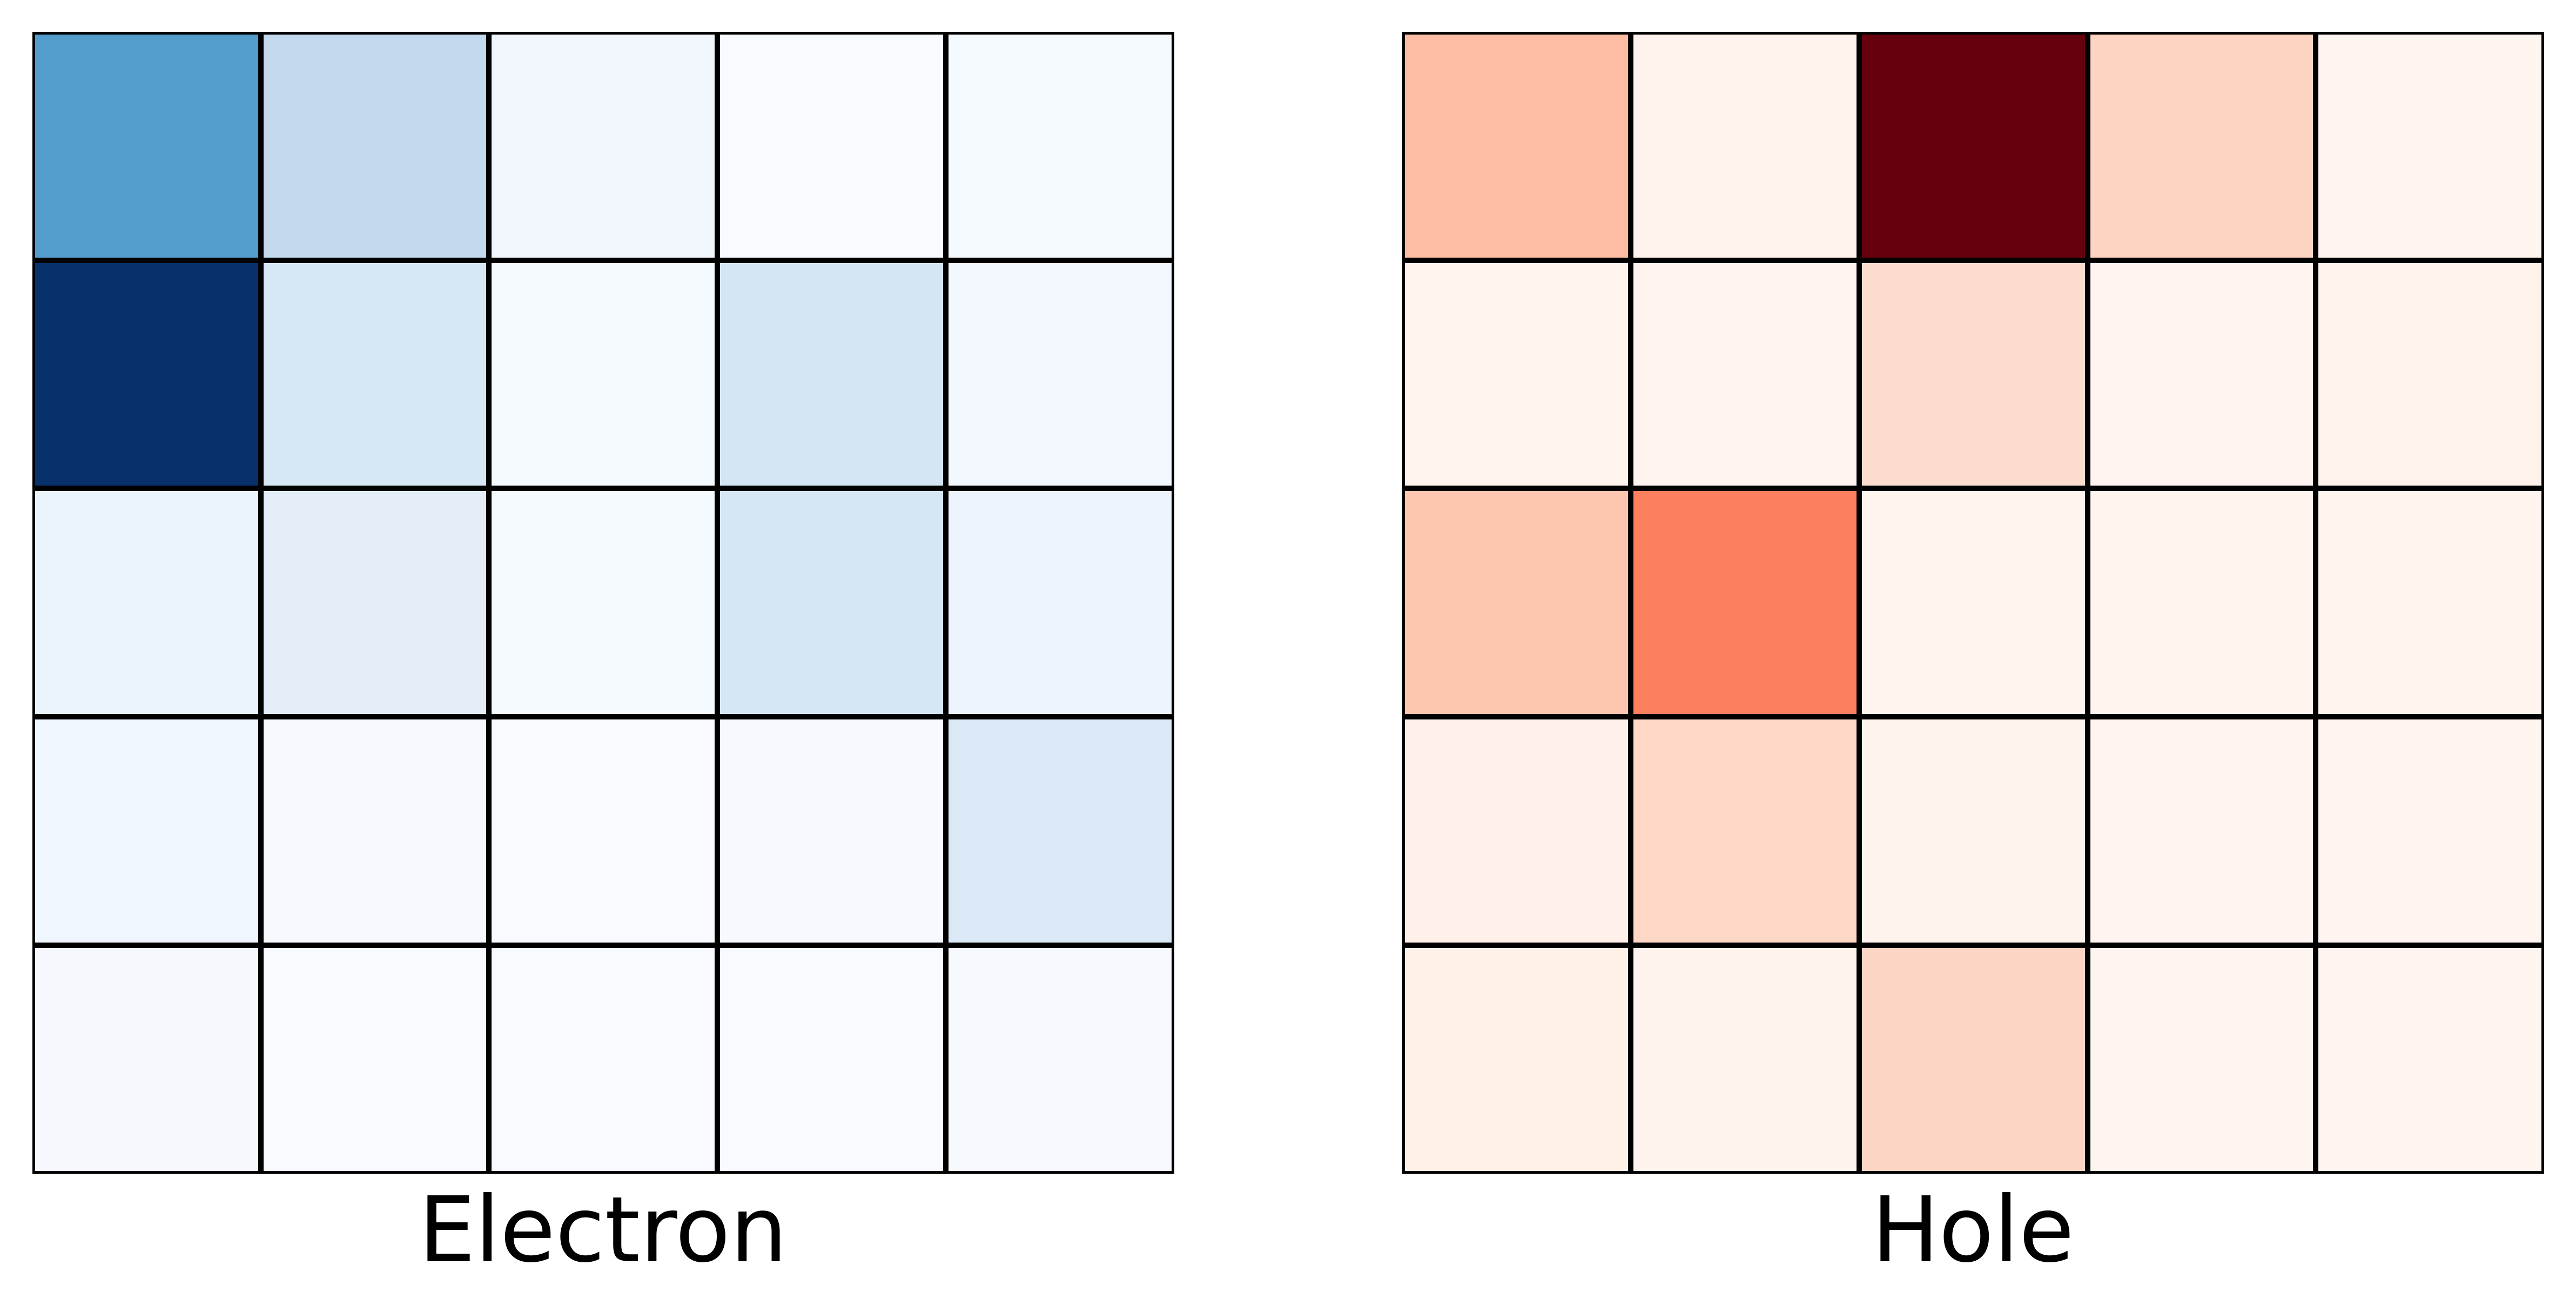

In [6]:
# Set save = True if you want to save the figure
save = False

which_lattice = 2
which_state = 500
plot_state_distribution(
    lattice_dict[which_lattice], which_state, save, save_path=save_path
)